In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package_in_LPA')

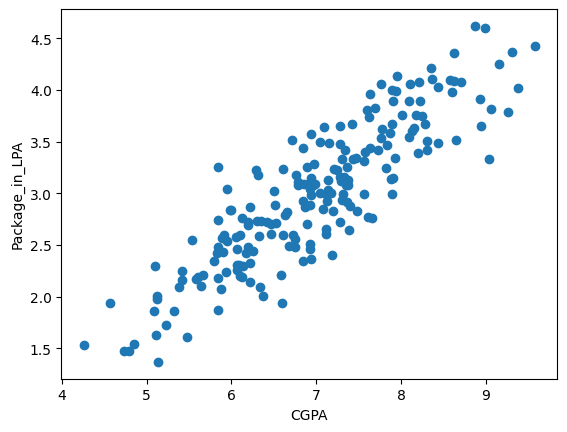

In [5]:
#plot cgpa vs placement
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package_in_LPA')

In [6]:
#creating dependent and independent variables
X = df.iloc[:,0:1] #taking all rows with 1st column
y = df.iloc[:,-1] #take all rows and last column

In [7]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

Split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

Linear Regression model


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

Train the model

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
X_test

,cgpa
40,9.38
51,9.26
139,7.19
197,7.21
170,6.22
82,5.58
183,7.28
46,6.07
70,5.79
100,7.95


In [14]:
y_test

40     4.02
51     3.79
139    2.40
197    3.24
170    2.87
82     2.17
183    2.72
46     2.26
70     2.35
100    4.14
179    3.03
83     3.49
25     3.65
190    2.69
159    4.08
173    2.56
95     2.79
3      3.67
41     2.70
58     3.09
14     3.42
143    1.54
12     3.65
6      2.60
182    2.08
161    3.33
128    3.34
122    2.01
101    3.52
86     2.77
64     2.92
47     3.26
158    3.04
34     3.42
38     4.36
196    2.57
4      3.57
72     3.62
67     2.89
145    2.18
Name: package, dtype: float64

Prediction on test data

In [15]:
lr.predict(X_test.iloc[3].values.reshape(1,1))
#prediction on 3rd row in X_test by converting into numpy array using .values and then into 2d data frame using reshape method

c:\Users\kumma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.11885919])

Text(0, 0.5, 'PackageinLPA')

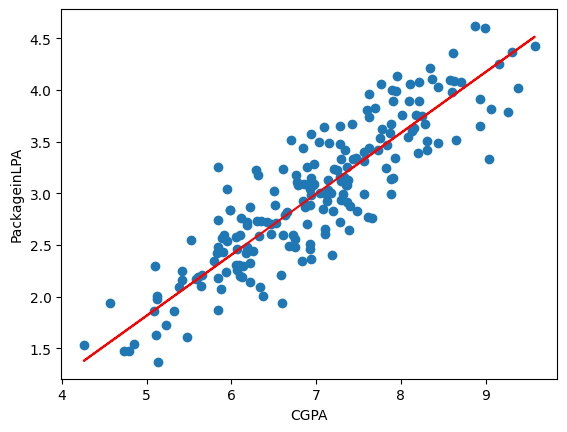

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('PackageinLPA')

Coefficients of Linear line

In [17]:
print(lr.coef_)
print(lr.intercept_)

[0.5892411]
-1.1295691481499261


Evaluating the performance of Linear Regression model

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_test.values

array([4.02, 3.79, 2.4 , 3.24, 2.87, 2.17, 2.72, 2.26, 2.35, 4.14, 3.03,
       3.49, 3.65, 2.69, 4.08, 2.56, 2.79, 3.67, 2.7 , 3.09, 3.42, 1.54,
       3.65, 2.6 , 2.08, 3.33, 3.34, 2.01, 3.52, 2.77, 2.92, 3.26, 3.04,
       3.42, 4.36, 2.57, 3.57, 3.62, 2.89, 2.18])

In [22]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.31001787170563705


In [23]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.14551953158290803


In [24]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.38147022371727524


In [25]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.651675487510094


Linear Regression from scratch

In [18]:
class MyLR:
    def __init__(self) -> None:
        self.slope = None
        self.intercept = None
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):#iterate through all rows
            num = num + ((X_train[i] - X_train.mean())*(y_train[i]- y_train.mean()))
            den = den +  ((X_train[i] - X_train.mean())* (X_train[i] - X_train.mean()))
        self.slope = num/den
        self.intercept = y_train.mean() - (self.m * X_train.mean())
        print(self.slope)
        print(self.intercept)

    def predict(self,X_test):
        print(X_test)
        return self.slope * X_test + self.b


    
